<a href="https://colab.research.google.com/github/soumyadweep/IPl-EDA-GRIP-SEPT-23/blob/main/IPL_EDA_GRIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

###Upload Datasets

In [42]:
matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")

In [43]:
matches.shape

(756, 18)

In [44]:
matches.sample(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
48,49,2017,Kanpur,2017-05-10,Gujarat Lions,Delhi Daredevils,Delhi Daredevils,field,normal,0,Delhi Daredevils,0,2,SS Iyer,Green Park,YC Barde,AK Chaudhary,NaN
405,406,2013,Kolkata,2013-04-20,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,normal,0,Chennai Super Kings,0,4,RA Jadeja,Eden Gardens,Asad Rauf,AK Chaudhary,NaN
271,272,2011,Chennai,2011-05-01,Chennai Super Kings,Deccan Chargers,Chennai Super Kings,bat,normal,0,Chennai Super Kings,19,0,JA Morkel,"MA Chidambaram Stadium, Chepauk",Aleem Dar,RB Tiffin,NaN
41,42,2017,Bangalore,2017-05-05,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kings XI Punjab,19,0,Sandeep Sharma,M Chinnaswamy Stadium,CB Gaffaney,C Shamshuddin,NaN
255,256,2011,Chandigarh,2011-04-21,Kings XI Punjab,Rajasthan Royals,Rajasthan Royals,field,normal,0,Kings XI Punjab,48,0,SE Marsh,"Punjab Cricket Association Stadium, Mohali",S Asnani,PR Reiffel,NaN


In [45]:
matches['team1'].value_counts()

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Delhi Capitals                   6
Name: team1, dtype: int64

Here we can see that **'Rising Pune Supergiant '** and **'Rising Pune Supergiants'** came twice though they are same team.  
Similarly **'Pune Warriors'** and **'Rising Pune Supergiant'** are same team.  
**'Deccan Chargers'** and **'Sunrisers Hyderabad'** are same team.  
**'Delhi Daredevils'** and **'Delhi Capitals'** are same team.  
 So we rename the respective columns to make the names same.  


In [46]:
#matches1 = matches.rename({"Rising Pune Supergiant": "Rising Pune Supergiants", "Pune Warriors": "Rising Pune Supergiants","Deccan Chargers":"Sunroisers Hyderabad", "Delhi Daredevils":"Delhi Capitals"}, axis="index")
#matches = matches.rename({"Deccan Chargers":"Sunroisers Hyderabad", "Delhi Daredevils":"Delhi Capitals"},axis = "index")
matches = matches.replace('Rising Pune Supergiants', 'Rising Pune Supergiant')
matches = matches.replace('Pune Warriors', 'Rising Pune Supergiant')
matches = matches.replace('Deccan Chargers', 'Sunrisers Hyderabad')
matches = matches.replace('Delhi Capitals', 'Delhi Daredevils')
matches = matches.replace('Bengaluru','Bangalore')
matches.venue.replace({'Feroz Shah Kotla Ground':'Feroz Shah Kotla',
                    'M Chinnaswamy Stadium':'M. Chinnaswamy Stadium',
                    'MA Chidambaram Stadium, Chepauk':'M.A. Chidambaram Stadium',
                     'M. A. Chidambaram Stadium':'M.A. Chidambaram Stadium',
                     'Punjab Cricket Association IS Bindra Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'Punjab Cricket Association Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'IS Bindra Stadium':'Punjab Cricket Association Stadium',
                    'Rajiv Gandhi International Stadium, Uppal':'Rajiv Gandhi International Stadium',
                    'Rajiv Gandhi Intl. Cricket Stadium':'Rajiv Gandhi International Stadium'},regex=True,inplace=True)

In [47]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [48]:
Match =matches.drop(['umpire3'],axis=1)

In [49]:
Match.shape

(756, 17)

In [50]:
# Drop the rows having NaN
Matches = Match.dropna()

In [51]:
Matches.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

In [52]:
Matches.shape

(743, 17)

In [53]:
deliveries.shape

(179078, 21)

In [54]:
deliveries.head(10)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,...,0,0,1,0,0,1,1,NaN,NaN,NaN


In [55]:
deliveries = deliveries.replace('Rising Pune Supergiants', 'Rising Pune Supergiant')
deliveries = deliveries.replace('Pune Warriors', 'Rising Pune Supergiant')
deliveries = deliveries.replace('Deccan Chargers', 'Sunrisers Hyderabad')
deliveries = deliveries.replace('Delhi Capitals', 'Delhi Daredevils')

In [56]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [57]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

### **Matches per season**

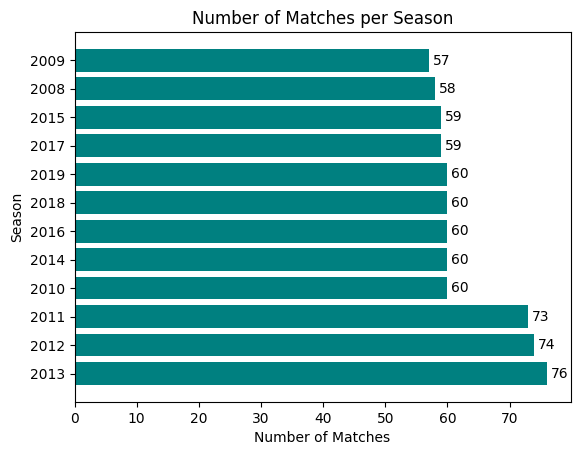

In [58]:
match_per_year = matches['season'].value_counts()
#print(match_per_year)
fig, ax = plt.subplots()
y_pos = range(len(match_per_year))  # Positions of the bars on the y-axis
bars = ax.barh(y_pos,match_per_year.values,color='teal')
# Label the bars with their values
for bar in bars:
    width = bar.get_width()
    label_x_pos = width + 2  # Adjust the position of the label as needed
    ax.text(label_x_pos, bar.get_y() + bar.get_height() / 2, str(int(width)), ha='center', va='center')
ax.set_yticks(y_pos)  # Set the y-ticks at the bar positions
ax.set_yticklabels(match_per_year.index)  # Set the y-tick labels to the season names
ax.set_xlabel('Number of Matches')
ax.set_ylabel('Season')
plt.title('Number of Matches per Season')
plt.show()


###**Individual Talents**

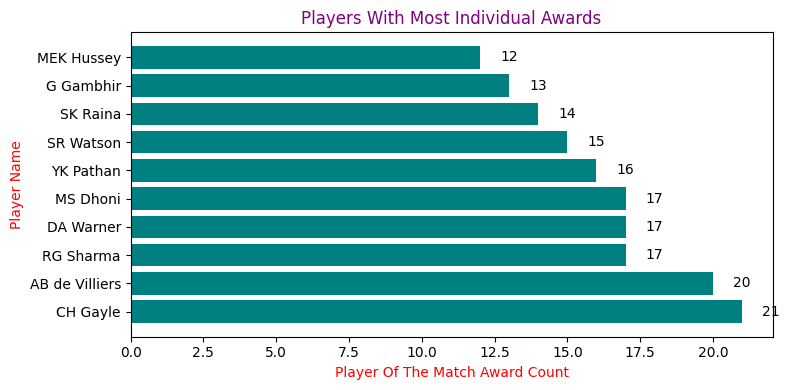

In [59]:
player_of_match = Matches['player_of_match'].value_counts()[:10]
fig, ax = plt.subplots(figsize=(8,4))
y_pos = range(len(player_of_match))  # Positions of the bars on the y-axis
bars = ax.barh(y_pos,player_of_match.values,color='teal')
# Label the bars with their values
for bar in bars:
    width = bar.get_width()
    label_x_pos = width + 1  # Adjust the position of the label as needed
    ax.text(label_x_pos, bar.get_y() + bar.get_height() / 2, str(int(width)), ha='center', va='center')
ax.set_yticks(y_pos)  # Set the y-ticks at the bar positions
ax.set_yticklabels(player_of_match.index)  # Set the y-tick labels to the season names
ax.set_xlabel('Player Of The Match Award Count',c='r')
ax.set_ylabel('Player Name',c='r')
plt.title('Players With Most Individual Awards',color='purple')
plt.tight_layout()
plt.show()

###**Teams by Performance**

Mumbai Indians                 109
Chennai Super Kings             98
Kolkata Knight Riders           92
Sunrisers Hyderabad             85
Royal Challengers Bangalore     82
Kings XI Punjab                 81
Delhi Daredevils                75
Rajasthan Royals                75
Rising Pune Supergiant          27
Gujarat Lions                   13
Kochi Tuskers Kerala             6
Name: winner, dtype: int64


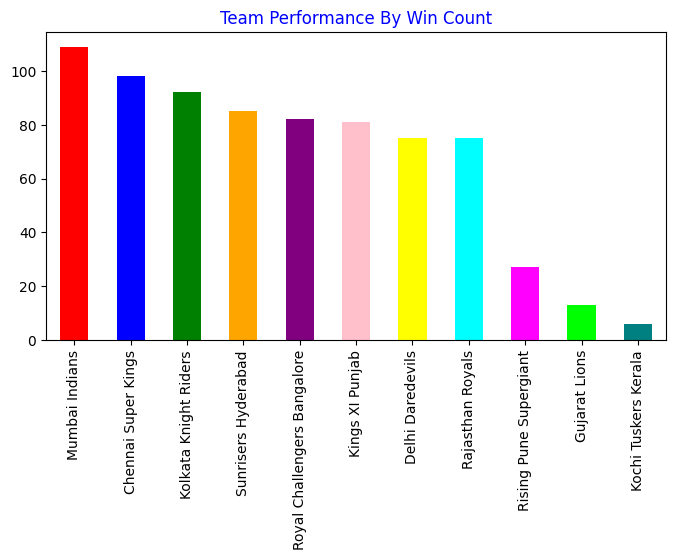

In [60]:
MostWinner = Matches['winner'].value_counts()
print(MostWinner)
#Defined list of colours for each bar
colors = ['red', 'blue', 'green', 'orange', 'purple', 'pink', 'yellow', 'cyan', 'magenta', 'lime','teal']
#Set the figure size
plt.figure(figsize=(8, 4))  # Adjust the width and height as needed
#Top  teams by win count
MostWinner.plot.bar(color=colors)
plt.title('Team Performance By Win Count',c='b')
plt.show()

### Performance of Teams in a particular Season

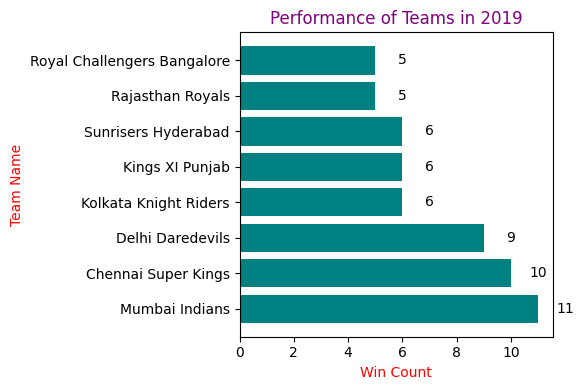

In [61]:
season_performance = Matches.loc[Matches.season == 2019, "winner"].value_counts()#.plot(kind="barh",figsize=(6,4))
fig,ax = plt.subplots(figsize =(6,4))
y_pos = range(len(season_performance))
bars = ax.barh(y_pos, season_performance.values,color='teal')
for bar in bars:
    width = bar.get_width()
    label_x_pos = width + 1  # Adjust the position of the label as needed
    ax.text(label_x_pos, bar.get_y() + bar.get_height() / 2, str(int(width)), ha='center', va='center')
ax.set_yticks(y_pos)  # Set the y-ticks at the bar positions
ax.set_yticklabels(season_performance.index)  # Set the y-tick labels to the season names
ax.set_xlabel('Win Count',c='r')
ax.set_ylabel('Team Name',c='r')
plt.title('Performance of Teams in 2019',color='purple')
plt.tight_layout()
plt.show()



### **Toss winner Opted for Batting or Fielding**

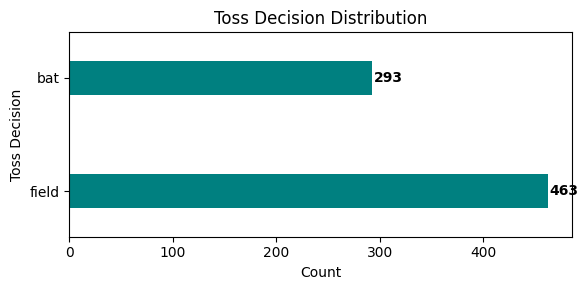

In [62]:
import matplotlib.pyplot as plt

bat_decision = matches['toss_decision'].value_counts()

# Create the horizontal bar plot
fig, ax = plt.subplots(figsize=(6, 3))
bars = bat_decision.plot(kind='barh', color='teal',width=0.3)

# Manually annotate the bars with labels
for i, v in enumerate(bat_decision.values):
    ax.text(v + 1, i, str(v), va='center', color='black', fontweight='bold')

# Set custom labels for the bars
ax.set_yticks(range(len(bat_decision)))
ax.set_yticklabels(bat_decision.index)

# Set labels and title
ax.set_xlabel('Count')
ax.set_ylabel('Toss Decision')
plt.title('Toss Decision Distribution')

plt.tight_layout()
plt.show()


### **Teams Won by a Margin More Than 50**

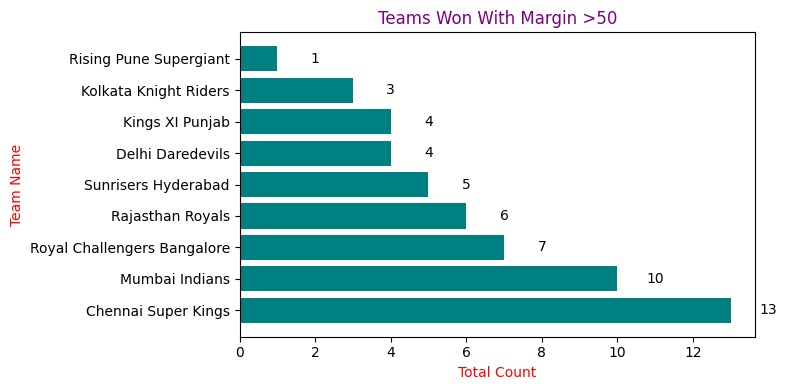

In [63]:
win_margin = Matches.loc[Matches.win_by_runs>50,"winner"].value_counts()
fig,ax = plt.subplots(figsize=(8,4))
y_pos = range(len(win_margin))
bars = ax.barh(y_pos,win_margin.values,color = 'teal')
for bar in bars:
    width = bar.get_width()
    label_x_pos = width + 1
    ax.text(label_x_pos, bar.get_y() + bar.get_height() / 2, str(int(width)), ha='center', va='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(win_margin.index)
ax.set_xlabel('Total Count',c='r')
ax.set_ylabel('Team Name',c='r')
plt.title('Teams Won With Margin >50',color='purple')
plt.tight_layout()
plt.show()


### **Teams Won By More Than 5 Wickets**

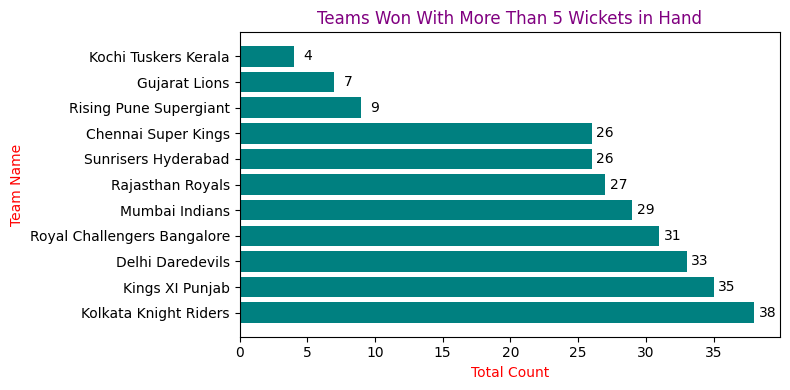

In [64]:
wicket_margin = Matches.loc[Matches.win_by_wickets>5,"winner"].value_counts()
fig,ax = plt.subplots(figsize=(8,4))
y_pos = range(len(wicket_margin))
bars = ax.barh(y_pos,wicket_margin.values,color = 'teal')
for bar in bars:
    width = bar.get_width()
    label_x_pos = width + 1
    ax.text(label_x_pos, bar.get_y() + bar.get_height() / 2, str(int(width)), ha='center', va='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(wicket_margin.index)
ax.set_xlabel('Total Count',c='r')
ax.set_ylabel('Team Name',c='r')
plt.title('Teams Won With More Than 5 Wickets in Hand',color='purple')
plt.tight_layout()
plt.show()


### **How Match Result is decided by Toss Factor?**

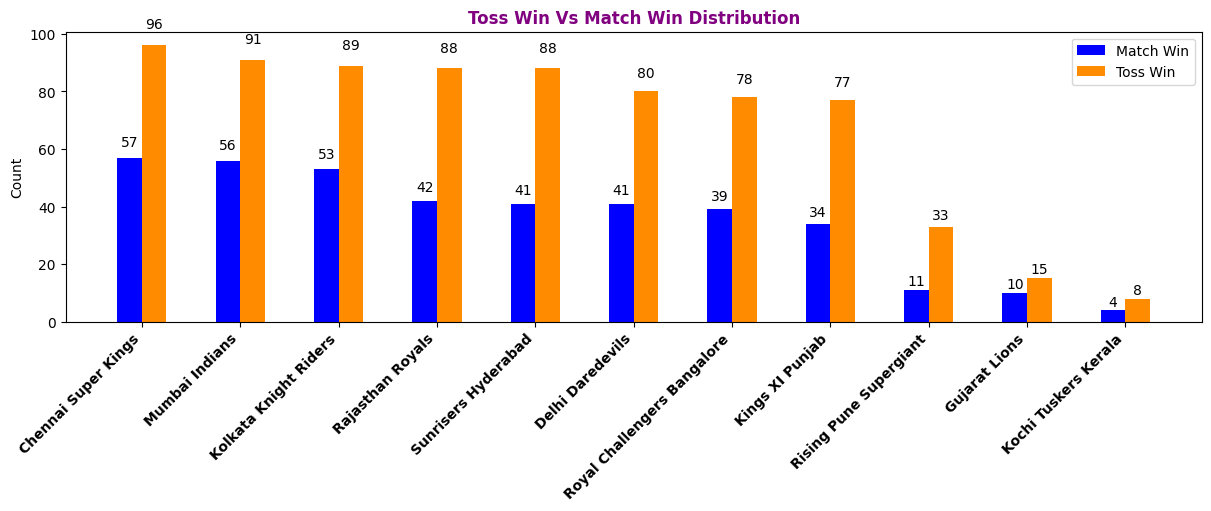

In [65]:
match_win = Matches.loc[Matches.toss_winner == Matches.winner,"winner"].value_counts()
toss_win = Matches['toss_winner'].value_counts()

ind = np.arange(len(match_win)) #the label locations
width = 0.25 # the width of the bars

fig,ax = plt.subplots(layout='constrained',figsize = (12,5))
rects1 = ax.bar(ind, match_win.values, width, color='blue')
rects2 = ax.bar(ind + width, toss_win.values, width, color='darkorange')

# add some text for labels, title and axes ticks
ax.set_ylabel('Count')
ax.set_title('Toss Win Vs Match Win Distribution',color = 'purple', fontweight='bold')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(match_win.index,rotation=45, ha='right',color = 'k', fontweight='bold')

ax.legend((rects1[0], rects2[0]), ('Match Win', 'Toss Win'))

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

### **Head to Head Record**

In [66]:
teams = matches.team1.unique().tolist()
teams.sort()
for team1 in teams:
    for team2 in matches.team2.unique().tolist():
        df_ttw = matches.loc[(matches["team1"] == team1) & (matches["team2"] == team2), "winner"]
        if len(df_ttw) > 0:
            print(df_ttw.value_counts())

Chennai Super Kings            6
Royal Challengers Bangalore    4
Name: winner, dtype: int64
Chennai Super Kings       3
Rising Pune Supergiant    1
Name: winner, dtype: int64
Kolkata Knight Riders    7
Chennai Super Kings      5
Name: winner, dtype: int64
Chennai Super Kings    7
Kings XI Punjab        4
Name: winner, dtype: int64
Chennai Super Kings    9
Delhi Daredevils       4
Name: winner, dtype: int64
Chennai Super Kings    8
Sunrisers Hyderabad    5
Name: winner, dtype: int64
Mumbai Indians         7
Chennai Super Kings    5
Name: winner, dtype: int64
Chennai Super Kings    7
Rajasthan Royals       5
Name: winner, dtype: int64
Kochi Tuskers Kerala    1
Chennai Super Kings     1
Name: winner, dtype: int64
Royal Challengers Bangalore    8
Delhi Daredevils               4
Name: winner, dtype: int64
Delhi Daredevils          3
Rising Pune Supergiant    2
Name: winner, dtype: int64
Kolkata Knight Riders    7
Delhi Daredevils         3
Name: winner, dtype: int64
Kings XI Punjab     9


### **Between Two Teams Which One Has Highest Parcentage of Win**

<Axes: ylabel='winner'>

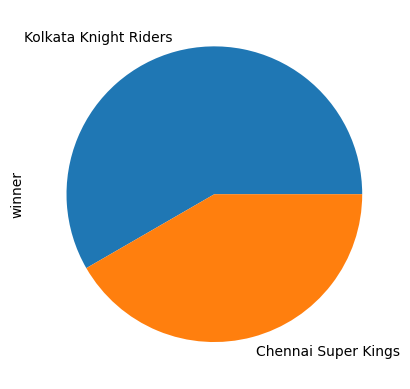

In [67]:
Matches.loc[(Matches["team1"] == "Chennai Super Kings") & (Matches["team2"] == "Kolkata Knight Riders"), "winner"].value_counts().plot(kind="pie")


### Stadiums That Hosted Most Of The Matches

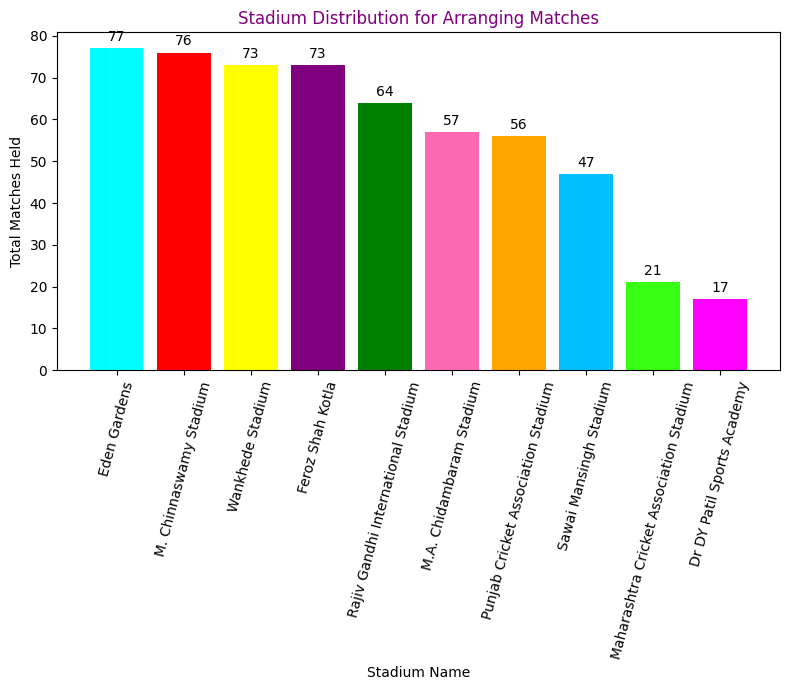

In [68]:
stadium = Matches['venue'].value_counts()[:10]
fig,ax = plt.subplots(figsize=(8,7))
y_pos = range(len(stadium))
colors = ['#00FFFF','#FF0000','#FFFF00','#800080','#008000','#FF69B4','#FFA500','#00BFFF','#39FF14','#FF00FF']

bars = ax.bar(y_pos,stadium.values,color = colors)
# Add labels for each bar
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points',
                ha='center', va='bottom')
ax.set_xticks(y_pos)
ax.set_xticklabels(stadium.index,rotation=75)
ax.set_ylabel('Total Matches Held',c='k')
ax.set_xlabel('Stadium Name',c='k')
plt.title("Stadium Distribution for Arranging Matches",color='purple')
plt.tight_layout()
plt.show()


### **Top 10 Cities By Number Of Matches**

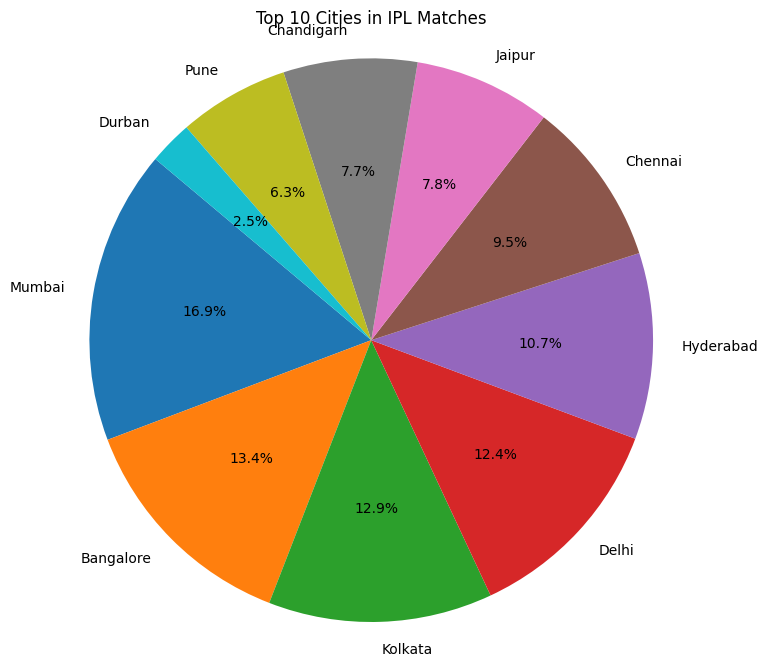

In [69]:
# Calculate the value counts for the top 10 cities
top_10_cities = matches['city'].value_counts().head(10)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_10_cities, labels=top_10_cities.index, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Top 10 Cities in IPL Matches')

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()


### **Top Umpires by Appearance**

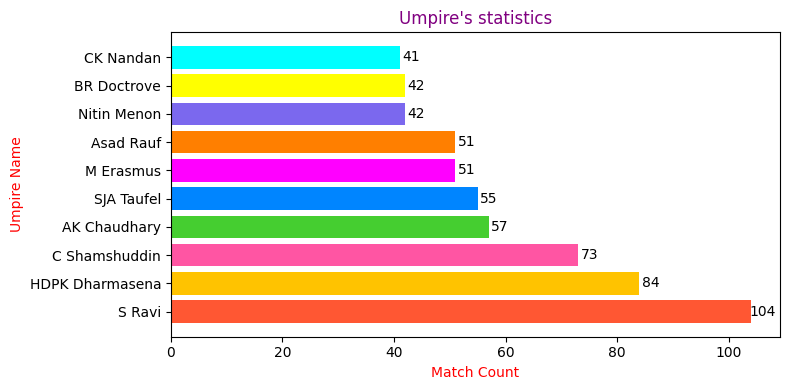

In [70]:
umpires = pd.concat([Matches['umpire1'],Matches['umpire2']])
umpire_appearance = umpires.value_counts()[:10]
fig,ax = plt.subplots(figsize=(8,4))
y_pos = range(len(umpire_appearance))
colors = ['#FF5733','#FFC300','#FF55A3','#45CE30','#0085FF','#FF00FF','#FF7F00','#7B68EE','#FFFF00','#00FFFF' ]

bars = ax.barh(y_pos,umpire_appearance.values,color = colors)

for bar in bars:
    width = bar.get_width()
    label_x_pos = width + 2
    ax.text(label_x_pos, bar.get_y() + bar.get_height() / 2, str(int(width)), ha='center', va='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(umpire_appearance.index)
ax.set_xlabel('Match Count',c='r')
ax.set_ylabel('Umpire Name',c='r')
plt.title("Umpire's statistics",color='purple')
plt.tight_layout()
plt.show()


### **Top 10 Batsmen by How many Balls They Faced**

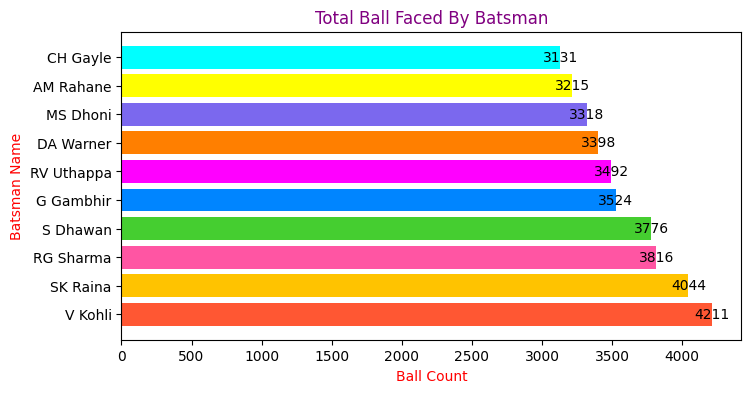

In [71]:
Ballfaced = deliveries['batsman'].value_counts()[:10]
fig,ax = plt.subplots(figsize=(8,4))
y_pos = range(len(Ballfaced))
colors = ['#FF5733','#FFC300','#FF55A3','#45CE30','#0085FF','#FF00FF','#FF7F00','#7B68EE','#FFFF00','#00FFFF' ]

bars = ax.barh(y_pos,Ballfaced.values,color = colors)

for bar in bars:
    width = bar.get_width()
    label_x_pos = width + 2
    ax.text(label_x_pos, bar.get_y() + bar.get_height() / 2, str(int(width)), ha='center', va='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(Ballfaced.index)
ax.set_xlabel('Ball Count',c='r')
ax.set_ylabel('Batsman Name',c='r')
plt.title("Total Ball Faced By Batsman",color='purple')
#plt.tight_layout()
plt.show()


**Bowler with most deliveries**

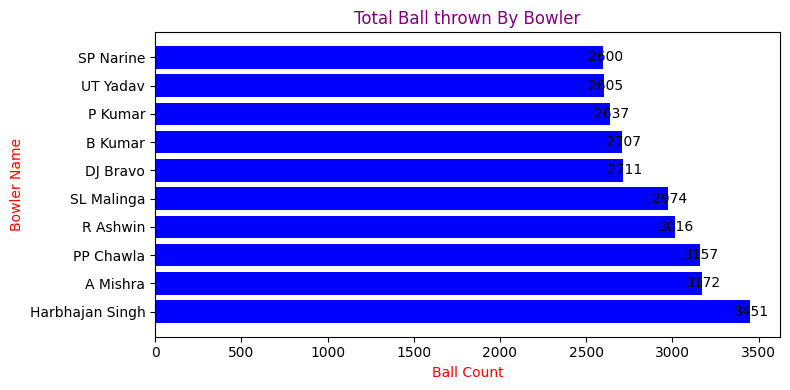

In [72]:
ballthrown = deliveries['bowler'].value_counts()[:10]
fig,ax = plt.subplots(figsize=(8,4))
y_pos = range(len(ballthrown))

bars = ax.barh(y_pos,ballthrown.values,color = 'b')

for bar in bars:
    width = bar.get_width()
    label_x_pos = width + 10
    ax.text(label_x_pos, bar.get_y() + bar.get_height() / 2, str(int(width)), ha='center', va='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(ballthrown.index)
ax.set_xlabel('Ball Count',c='r')
ax.set_ylabel('Bowler Name',c='r')
plt.title("Total Ball thrown By Bowler",color='purple')
plt.tight_layout()
plt.show()


### Total Extra Runs including 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs',  'penalty_runs', 'extra_runs' Given By Any Team

<ipython-input-73-fb7a2d32f9cc>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  extra_runs_data = deliveries.groupby('batting_team')['wide_runs','bye_runs','legbye_runs','noball_runs', 'penalty_runs', 'extra_runs'].sum()


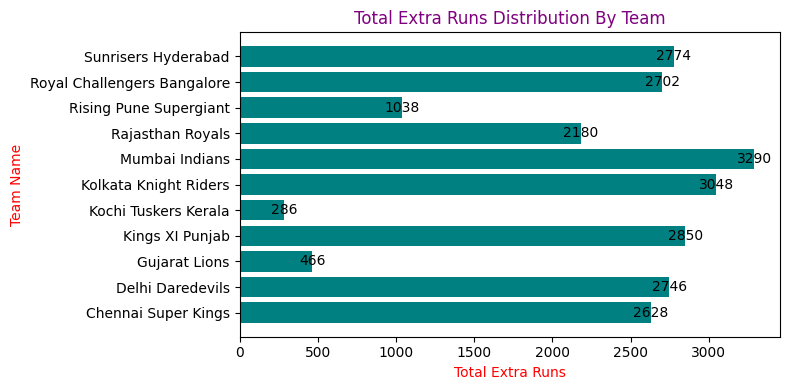

In [73]:
# Group the data by 'batting_team' and calculate the total extra runs[]
extra_runs_data = deliveries.groupby('batting_team')['wide_runs','bye_runs','legbye_runs','noball_runs', 'penalty_runs', 'extra_runs'].sum()

# Calculate the total extra runs for each team
extra_runs_data['total_extra_runs'] = extra_runs_data.sum(axis=1)

# Reset the index to have 'batting_team' as a column
extra_runs_data.reset_index(inplace=True)

fig,ax = plt.subplots(figsize=(8,4))
y_pos = range(len(extra_runs_data))
bars = ax.barh(y_pos,extra_runs_data['total_extra_runs'],color = 'teal')
for bar in bars:
    width = bar.get_width()
    label_x_pos = width + 1
    ax.text(label_x_pos, bar.get_y() + bar.get_height() / 2, str(int(width)), ha='center', va='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(extra_runs_data['batting_team'])
ax.set_xlabel('Total Extra Runs',c='r')
ax.set_ylabel('Team Name',c='r')
plt.title("Total Extra Runs Distribution By Team",color='purple')
plt.tight_layout()
plt.show()


### Reason of wicket fall

caught                   5348
bowled                   1581
run out                   852
lbw                       540
stumped                   278
caught and bowled         211
retired hurt               12
hit wicket                 10
obstructing the field       2
Name: dismissal_kind, dtype: int64

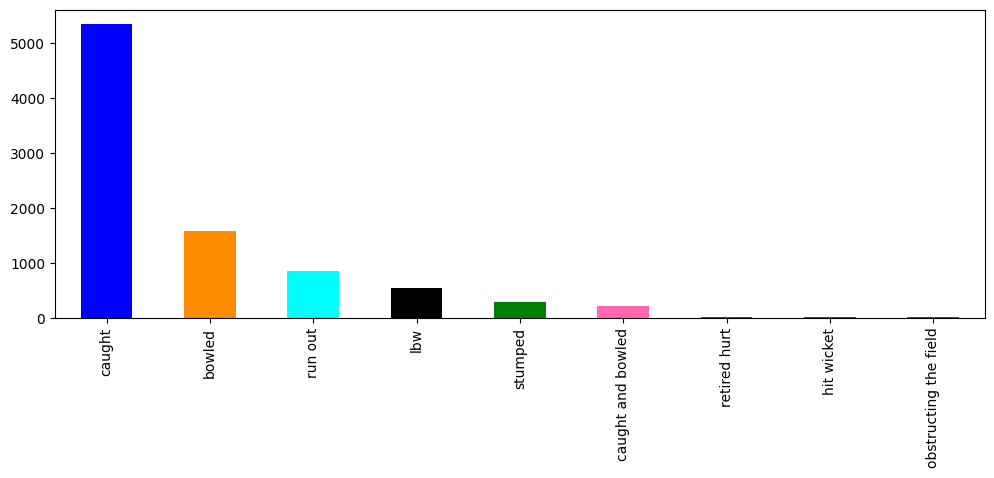

In [74]:
colors = ['blue','darkorange','cyan','black','green','hotpink','r','r','r']
deliveries['dismissal_kind'].value_counts().plot(kind='bar',figsize=(12,4),color = colors)
deliveries['dismissal_kind'].value_counts()

### Which Fielder Contributed More For The Team in Terms of Run Out or Catch Out

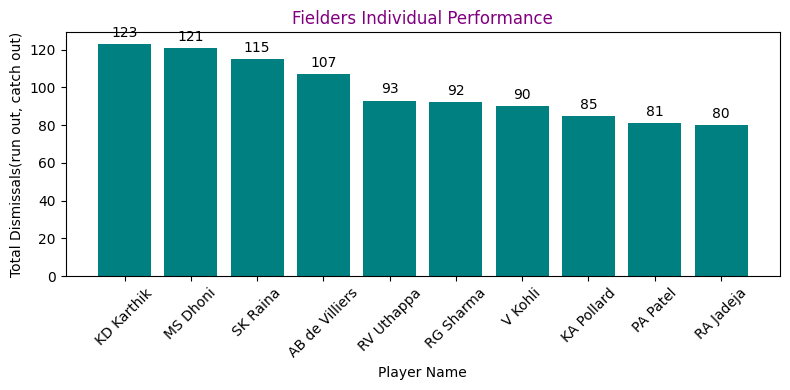

In [75]:
# Filter the DataFrame to exclude rows with missing 'fielder'
filtered_data = deliveries.dropna(subset=['fielder'])

# Create a boolean mask to identify catches and run-outs
is_catch = (filtered_data['dismissal_kind'] == 'caught')
is_run_out = (filtered_data['dismissal_kind'] == 'run out')

# Group by 'fielder' and count catches and run-outs
fielder_stats = filtered_data[is_catch | is_run_out].groupby('fielder')['dismissal_kind'].count().reset_index()

# Sort by the number of dismissals in descending order to find the best fielders
best_fielders = fielder_stats.sort_values(by='dismissal_kind', ascending=False)[:10]


fig,ax = plt.subplots(figsize=(8,4))
y_pos = range(len(best_fielders))
bars = ax.bar(y_pos,best_fielders['dismissal_kind'],color = 'teal')
# Add labels for each bar
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points',
                ha='center', va='bottom')
ax.set_xticks(y_pos)
ax.set_xticklabels(best_fielders['fielder'],rotation=45)
ax.set_ylabel('Total Dismissals(run out, catch out)',c='k')
ax.set_xlabel('Player Name',c='k')
plt.title("Fielders Individual Performance",color='purple')
plt.tight_layout()
plt.show()

## Thank You